<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Initial Checks

In [ ]:
#|eval: false
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#|eval: false
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"
!pip list | grep "fastAIcourse"

fastai                        2.7.12
fastbook                      0.0.28
ipywidgets                    8.1.0
fastAIcourse                  0.0.1       /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/fastAIcourse


In [ ]:
#|eval: false
import torch

In [ ]:
#|eval: false
torch.cuda.is_available()

True

## Gather Data

In [ ]:
#|eval: false
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import os

In [ ]:
#|eval: false
from fastAIcourse.functions import *

In [ ]:
#|eval: false
?functions

Object `functions` not found.


Image file exists.


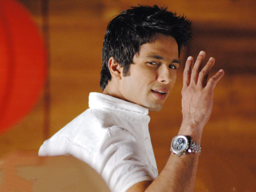

In [ ]:
#|eval: false
download_pic('indian actor close up',
             name = 'indian', 
             folder = './Data/actors_test', 
             n_images = 10)

In [ ]:
#|eval: false
file_path = "./Data/countries.txt"
searches = read_from_file(file_path)
print(searches)

('Chinese', 'Indian', 'American', 'Indonesian', 'Pakistani', 'Brazilian', 'Nigerian', 'Bangladeshi', 'Russian', 'Mexican')


In [ ]:
#|code-fold: true
#|eval: false
path = Path('Data/actors')

create_data_folder(folder_path = path,
                   searches = searches,
                   before = 'Famous ',
                   after = ' actor close up',
                   amount = 400,
                   recreate = False
                  )

Folder already exists: Data/actors


## Design Model

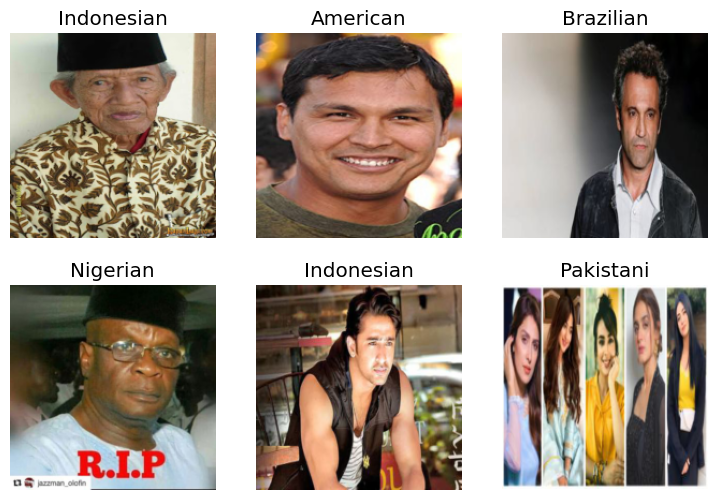

In [ ]:
#|eval: false
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

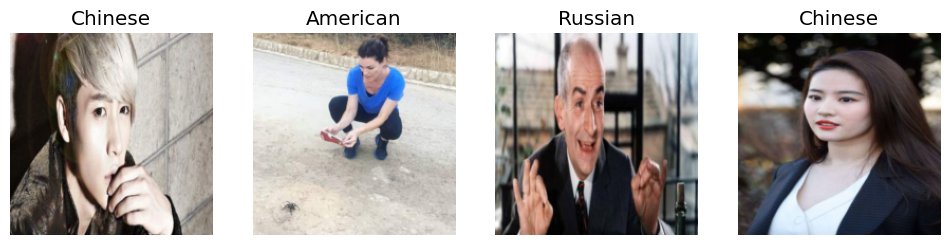

In [ ]:
#|eval: false
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#|eval: false
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.179393,2.104050,0.638478,00:12


/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,2.069143,1.920105,0.596195,00:10
1,1.619401,1.932125,0.572939,00:10
2,1.102896,1.936990,0.557082,00:10
3,0.706442,1.934179,0.542283,00:10
4,0.472939,1.952913,0.550740,00:09


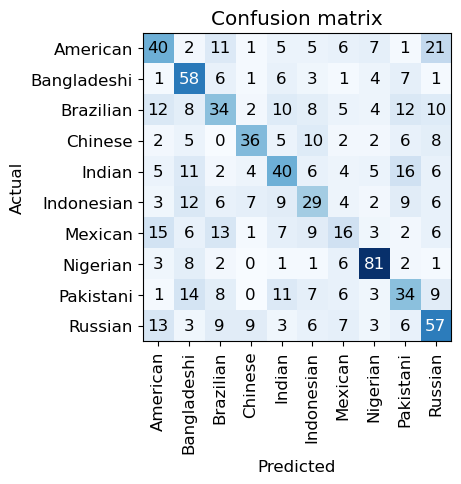

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

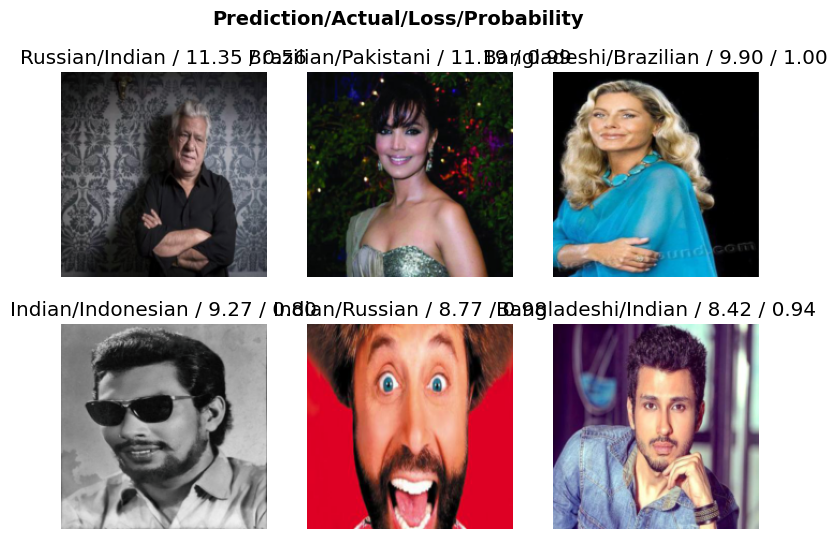

In [ ]:
#|eval: false
interp.plot_top_losses(6, nrows=2)

## Testing

{'American': 0.45388, 'Bangladeshi': 4.37719, 'Brazilian': 0.26213, 'Chinese': 0.55622, 'Indian': 82.2438, 'Indonesian': 4.60845, 'Mexican': 0.18763, 'Nigerian': 0.30977, 'Pakistani': 6.66223, 'Russian': 0.3387}


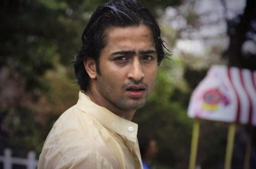

In [ ]:
#|eval: false
image= f'./Data/actors_test/indian{8}.jpg'

print(classify_images(learn, image))
Image.open(image).to_thumb(256,256)

## New models

In [ ]:
#|eval: false
!pip list | grep 'timm'

timm                          0.9.5


In [ ]:
#|eval: false
import timm

In [ ]:
#|eval: false
timm.list_models('convnext*')[0:5]

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols']

In [ ]:
#|eval: false
timm.list_models('resnet1*')[0:5]

['resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet101']

In [ ]:
#|eval: false
learn1 = vision_learner(dls, 'resnet26', metrics=error_rate).to_fp16()
learn1.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.038601,2.324387,0.600423,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.517086,1.872905,0.563425,00:10
1,1.243283,1.930918,0.562368,00:10
2,0.944465,1.887556,0.546512,00:10
3,0.680720,1.865837,0.526427,00:10
4,0.498218,1.859178,0.525370,00:10


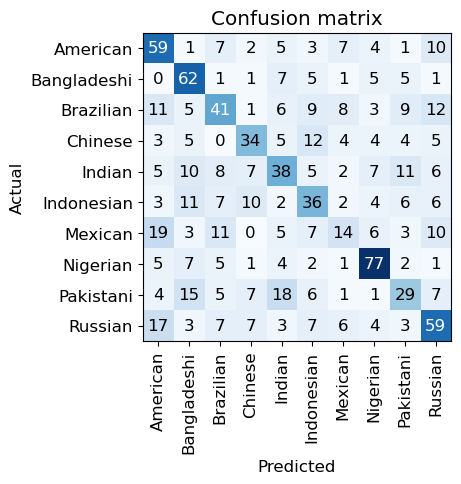

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

{'American': 0.15403, 'Bangladeshi': 37.17878, 'Brazilian': 1.32174, 'Chinese': 0.18616, 'Indian': 57.35912, 'Indonesian': 1.40098, 'Mexican': 0.02827, 'Nigerian': 0.01611, 'Pakistani': 2.14303, 'Russian': 0.21178}


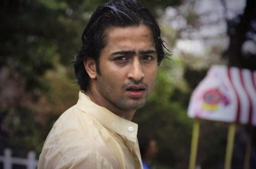

In [ ]:
#|eval: false
print(classify_images(learn1, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn2 = vision_learner(dls, 'resnetv2_50', metrics=error_rate).to_fp16()
learn2.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.192997,2.213052,0.686047,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.709785,2.113565,0.627907,00:12
1,1.497837,2.185306,0.630021,00:13
2,1.194115,2.119277,0.621565,00:13
3,0.945311,2.111763,0.619450,00:13
4,0.761849,2.108063,0.616279,00:13


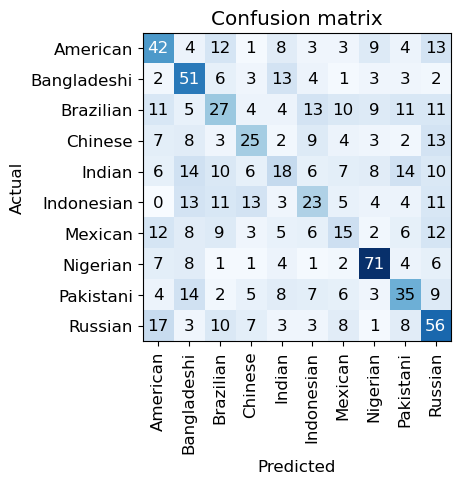

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

{'American': 0.70139, 'Bangladeshi': 0.13162, 'Brazilian': 0.84919, 'Chinese': 0.35034, 'Indian': 90.76585, 'Indonesian': 0.36323, 'Mexican': 0.0345, 'Nigerian': 0.02677, 'Pakistani': 6.63958, 'Russian': 0.13753}


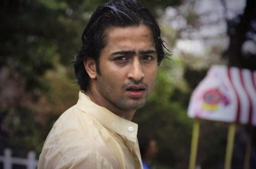

In [ ]:
#|eval: false
print(classify_images(learn2, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn3 = vision_learner(dls, 'convnextv2_tiny', metrics=error_rate).to_fp16()
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.084645,1.699032,0.538055,00:21
1,2.197313,1.444224,0.461945,00:21
2,1.606597,1.346364,0.439746,00:24
3,1.223254,1.333012,0.442918,00:21
4,0.999678,1.317928,0.430233,00:21


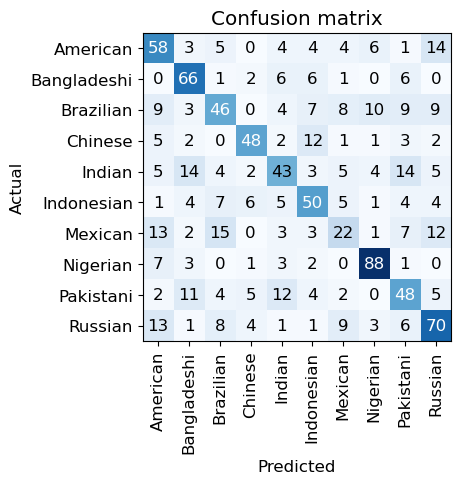

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix()

{'American': 0.02867, 'Bangladeshi': 35.97341, 'Brazilian': 0.04114, 'Chinese': 0.01865, 'Indian': 3.26854, 'Indonesian': 2.47205, 'Mexican': 0.54198, 'Nigerian': 0.05232, 'Pakistani': 57.48535, 'Russian': 0.1179}


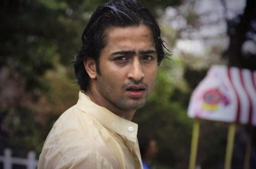

In [ ]:
#|eval: false
print(classify_images(learn3, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
m = learn3.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [ ]:
#|eval: false
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 4.9372e+00, -1.2659e-03,  1.1230e+00,  3.4577e-01,  2.0625e-01,  4.6985e-01, -1.4012e-02,  1.9154e+00,  3.0350e+00,  1.5650e+00,  5.7664e-01,  5.4123e-03,  3.3945e+00,  1.2195e+00,
          5.5851e-03,  2.1248e+00,  1.7247e+00,  7.6736e-01,  2.3200e+00,  3.1445e+00,  1.6798e+00,  1.3341e+00,  3.5924e-01,  2.2141e+00,  1.7624e-01,  1.4829e-01,  1.8288e+00, -1.2401e-02,
          2.3919e+00,  3.6850e+00,  4.0938e-01,  7.9537e-03,  3.6993e-01,  1.2085e+00,  7.2394e-01,  2.8588e-01,  2.4201e+00,  3.1902e-01,  6.9723e-01,  6.4916e-01,  7.8508e-01,  9.1887e-03,
          2.8029e-01,  5.4152e-01,  8.1132e-01,  3.3446e-01,  7.8880e-01,  5.9736e-01,  2.1424e-01,  3.3895e-01,  2.2394e+00,  2.1994e-03,  1.1603e+00, -2.4957e-03,  3.2504e+00,  5.8534e-01,
          2.0935e-01,  4.1914e+00,  2.9365e-01,  8.4789e-01, -6.3293e-03,  2.0600e-03,  6.4346e-01,  2.2793e-01,  1.2628e+00,  2.7581e-01,  6.4577e-01,  2.5491e-01,  4.6894e+00,  6.5958e-01,
         -3.4187e-03, 